In [1]:
import numpy as np
import pandas as pd
from scifit.solvers import FitSolver1D
from scipy import special, stats

In [2]:
class Model(FitSolver1D):
    @staticmethod
    def model(x, b, scale):
        return stats.rice.pdf(x[:,0], b=b, loc=0., scale=scale)

In [3]:
model = Model()

In [4]:
data = model.synthetic_dataset(xmin=0, xmax=50, parameters=(5, 7), sigma=0.001)

In [5]:
sol = model.fit(data, p0=[10, 10])

In [6]:
sol

{'success': True,
 'parameters': array([5.0028224 , 6.99919218]),
 'covariance': array([[ 0.00171744, -0.00220189],
        [-0.00220189,  0.00297419]]),
 'info': {'fvec': array([-0.47143516,  1.19097329, -1.4327163 ,  0.31262132,  0.72049858,
         -0.88740567, -0.86019007,  0.63514448, -0.01862648,  2.23690653,
         -1.16061595, -1.00992442, -0.98164124,  1.9800027 ,  0.27868865,
         -0.07027968, -0.48161797, -0.36509331, -1.38661406,  1.50235525,
          0.18667258,  0.67139588, -0.1494341 , -0.48854368, -1.24264625,
          0.54512302, -0.60752218,  1.87252315,  0.22466629, -1.0302266 ]),
  'nfev': 93,
  'fjac': array([[-1.07018643e+02, -8.09881481e-06, -3.17275921e-05,
          -1.05204074e-04, -3.13813217e-04, -8.55028950e-04,
          -2.14501189e-03, -4.97714644e-03, -1.07085414e-02,
          -2.13911989e-02, -3.96886167e-02, -6.83710545e-02,
          -1.09239720e-01, -1.61559370e-01, -2.20464212e-01,
          -2.76178160e-01, -3.14966728e-01, -3.22261089e-

<Axes: title={'center': 'Fit Plot: \nn=30, $R^2$=0.998, $\\chi^2_r$=30.699, $P(\\chi^2_{28} \\geq 1.096 \\,|\\, H_0) = 0.3306$\n$\\beta \\pm s_{\\beta}$ = (5 ± 0.0414; 7 ± 0.0545)'}, xlabel='Feature, $x_1$', ylabel='Target, $y$'>

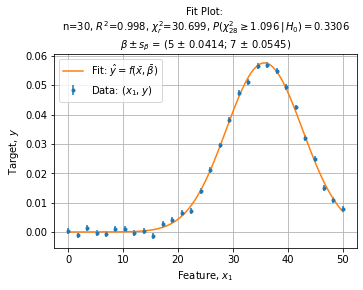

In [7]:
model.plot_fit()

<Axes: title={'center': 'Fit Log-Loss Plot: \nn=30, $R^2$=0.998, $\\chi^2_r$=30.699, $P(\\chi^2_{28} \\geq 1.096 \\,|\\, H_0) = 0.3306$\n$\\beta \\pm s_{\\beta}$ = (5 ± 0.0414; 7 ± 0.0545)'}, xlabel='Parameter, $\\beta_{1}$', ylabel='Parameter, $\\beta_{2}$'>

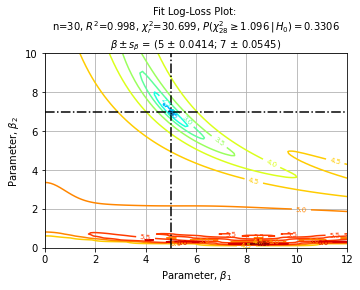

In [8]:
domains = pd.DataFrame({"min": [0, 0], "max": [12, 10]}).T
levels = list(np.arange(0, 7, 0.5))
model.plot_loss(domains=domains, levels=levels, log_loss=True)

<Axes: title={'center': 'Fit Log-Loss Plot: \nn=30, $R^2$=0.998, $\\chi^2_r$=30.699, $P(\\chi^2_{28} \\geq 1.096 \\,|\\, H_0) = 0.3306$\n$\\beta \\pm s_{\\beta}$ = (5 ± 0.0414; 7 ± 0.0545)'}, xlabel='Parameter, $\\beta_{1}$', ylabel='Parameter, $\\beta_{2}$'>

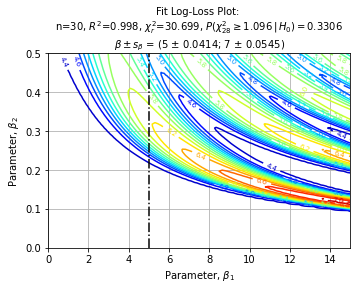

In [9]:
domains = pd.DataFrame({"min": [0, 0.], "max": [15, 0.5]}).T
model.plot_loss(domains=domains, levels=15, log_loss=True)

<Axes: title={'center': 'Fit Log-Loss Plot: \nn=30, $R^2$=0.998, $\\chi^2_r$=30.699, $P(\\chi^2_{28} \\geq 1.096 \\,|\\, H_0) = 0.3306$\n$\\beta \\pm s_{\\beta}$ = (5 ± 0.0414; 7 ± 0.0545)'}, xlabel='Parameter, $\\beta_{1}$', ylabel='Parameter, $\\beta_{2}$'>

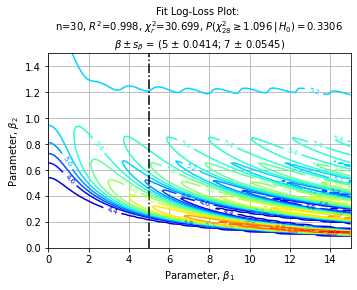

In [10]:
domains = pd.DataFrame({"min": [0, 0.], "max": [15, 1.5]}).T
model.plot_loss(domains=domains, levels=15, log_loss=True)

<Axes: title={'center': 'Fit Log-Loss Plot: \nn=30, $R^2$=0.998, $\\chi^2_r$=30.699, $P(\\chi^2_{28} \\geq 1.096 \\,|\\, H_0) = 0.3306$\n$\\beta \\pm s_{\\beta}$ = (5 ± 0.0414; 7 ± 0.0545)'}, xlabel='Parameter, $\\beta_{1}$', ylabel='Parameter, $\\beta_{2}$'>

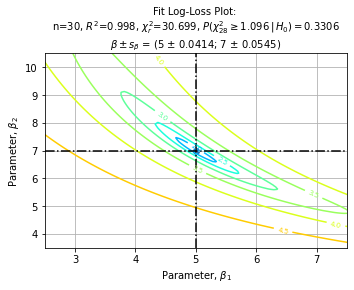

In [11]:
model.plot_loss(factor=5, levels=levels, log_loss=True)